In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("icml_face_data.csv")
df.head()

,emotion,Usage,pixels
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [7]:
df[' Usage'].unique(), df[' Usage'].value_counts()

(array(['Training', 'PublicTest', 'PrivateTest'], dtype=object),
 Training       28709
 PublicTest      3589
 PrivateTest     3589
 Name:  Usage, dtype: int64)

In [4]:
emotions = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}

In [14]:
def prepare_data(df):
    img_array = np.zeros(shape=(len(df), 48, 48))
    img_label = np.array(list(map(int, df['emotion'])))

    for i, row in enumerate(df.index):
        img = np.fromstring(df.loc[row, ' pixels'], dtype=int, sep=' ')
        img = np.reshape(img, (48, 48))
        img_array[i] = img

    return img_array, img_label

In [15]:
train_img_array, train_img_label = prepare_data(df[df[' Usage'] == 'Training'])

In [57]:
train_img_array.shape, train_img_label[:5], len(train_img_label)

((28709, 48, 48), array([0, 0, 2, 4, 6]), 28709)

In [17]:
val_img_array, val_img_label = prepare_data(df[df[' Usage'] == 'PublicTest'])
test_img_array, test_img_label = prepare_data(df[df[' Usage'] == 'PrivateTest'])

In [18]:
val_img_array.shape, test_img_array.shape

((3589, 48, 48), (3589, 48, 48))

In [22]:
def plot_all_emotions(df, train_img_array, train_img_label):
    fig, axs = plt.subplots(1, 7, figsize=(30, 12))
    axs = axs.ravel()
    for i in range(7):
        idx = df[df['emotion'] == i].index[i]
        axs[i].imshow(train_img_array[idx], cmap='gray')
        axs[i].set_title(emotions[train_img_label[idx]])
        axs[i].set_xticklabels([])
        axs[i].set_yticklabels([])
        

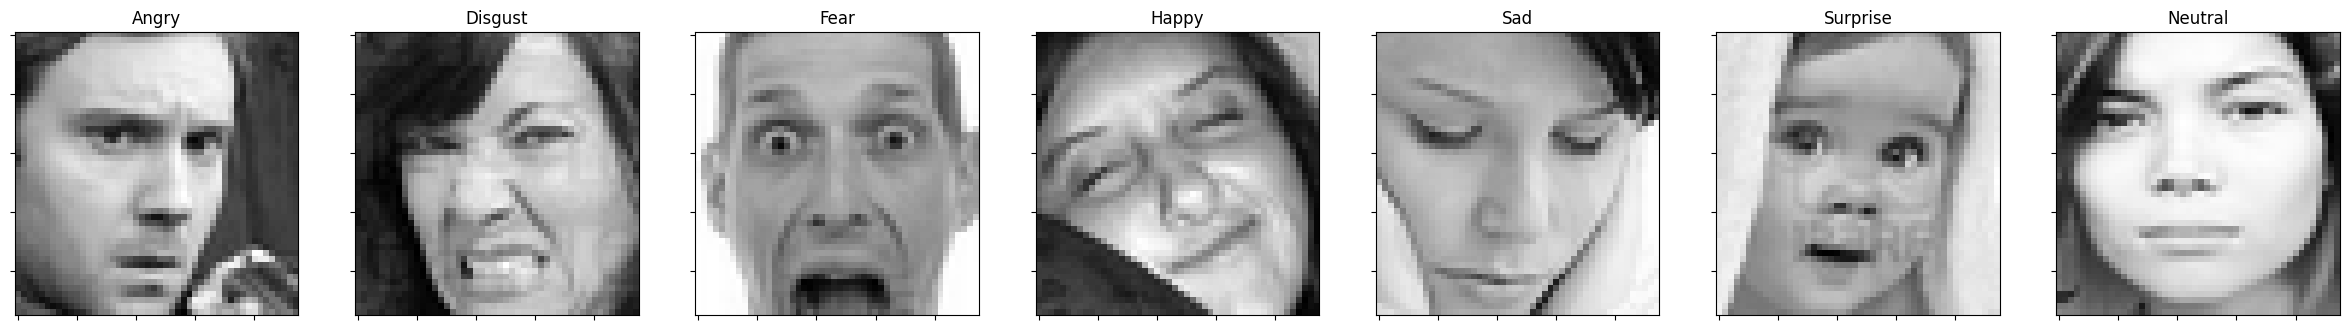

In [23]:
plot_all_emotions(df, train_img_array, train_img_label)

In [32]:
unique, counts = np.unique(train_img_label, return_counts=True)
tr_dist = dict(zip(map(emotions.get, unique), counts))
tr_dist

{'Angry': 3995,
 'Disgust': 436,
 'Fear': 4097,
 'Happy': 7215,
 'Sad': 4830,
 'Surprise': 3171,
 'Neutral': 4965}

In [33]:
unique, counts = np.unique(val_img_label, return_counts=True)
val_dist = dict(zip(map(emotions.get, unique), counts))
val_dist

{'Angry': 467,
 'Disgust': 56,
 'Fear': 496,
 'Happy': 895,
 'Sad': 653,
 'Surprise': 415,
 'Neutral': 607}

In [39]:
unique, counts = np.unique(test_img_label, return_counts=True)
test_dist = dict(zip(map(emotions.get, unique), counts))
test_dist

{'Angry': 491,
 'Disgust': 55,
 'Fear': 528,
 'Happy': 879,
 'Sad': 594,
 'Surprise': 416,
 'Neutral': 626}

In [37]:
def plot_distributions(dist1, dist2, title1, title2):
    fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=False)
    axs[0].bar(dist1.keys(), dist1.values(), color='orange')
    axs[0].set_title(title1)
    axs[0].grid()

    axs[1].bar(dist2.keys(), dist2.values())
    axs[1].set_title(title2)
    axs[1].grid()

    plt.show()

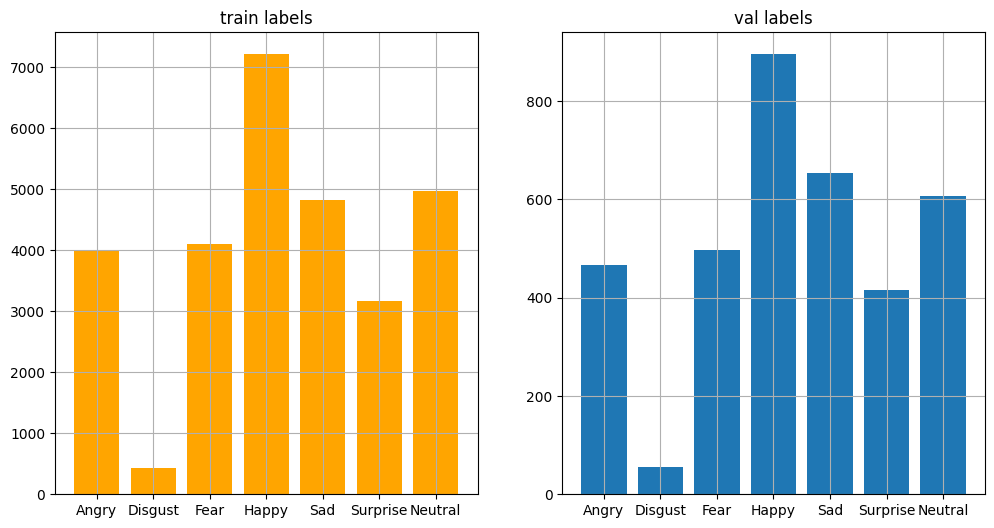

In [38]:
plot_distributions(tr_dist, val_dist, 'train labels', 'val labels')

In [41]:
df[df[' Usage']=='Training']['emotion'].value_counts().sort_index()

0    3995
1     436
2    4097
3    7215
4    4830
5    3171
6    4965
Name: emotion, dtype: int64

In [53]:
cls_weight = (df[df[' Usage']=='Training']['emotion'].value_counts().sort_index() / len(df[df[' Usage']=='Training'])).tolist()

In [54]:
cls_weight

[0.1391549688251071,
 0.01518687519593159,
 0.14270786164617366,
 0.2513149186666202,
 0.16823992476226968,
 0.11045316799609878,
 0.17294228290779895]